In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
from skimage.io import imsave
from machinedesign.autoencoder.interface import load
from machinedesign.viz import grid_of_images_default, horiz_merge
from lightjob.cli import load_db
import keras.backend as K
import matplotlib.pyplot as plt
from IPython.display import Image
from fluentopt.utils import flatten_dict
import seaborn as sns
from scipy.stats import binned_statistic
pd.options.display.max_columns = 100
sns.set_style('white')

def show_several(df):
    for j in df.index:
        print(j)
        show_one(j)
def show_one(j):
    try:
        X = np.load('../results/jobs/{}/gen/generated.npz'.format(j))['generated'][0:100]
    except Exception:
        return
    X = grid_of_images_default(X)
    imsave('out.png', X)
    im = Image('out.png')
    display(im)

In [3]:
df_full = pd.read_csv('../../export/hypers.csv')
df_full = df_full.set_index('job_id')

## Fix stride. vary nb of layers

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_deep']
df = df[df['stride']==2]
df = df.sort_values(by='nb_layers')
df

## Fix nb layers. Vary stride

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_deep']
df = df[df['nb_layers'] == 3]
df = df.sort_values(by='stride')
df

## wta kchannel

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_deep_kchannel']
df = df[df['zero_ratio']==0.9]
df = df.sort_values(by='nb_layers')
df

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_deep_kchannel']
df = df[df['nb_layers']==4]
df = df.sort_values(by='zero_ratio')
df

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_deep_kchannel_stride']
df = df.sort_values(by='nb_layers')
df.head()

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_capacity']
df = df[df['nb_layers']==3]
df = df.sort_values(by='bottleneck', ascending=False)

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_noise']
df = df[df['nb_layers']==3]
df = df.sort_values(by='noise')
df = df[df['noise'] < 0.6]

In [ ]:
d = df_full.copy()
#d['y'] = d['emnist_letters_count']
d['y'] =  d['emnist_letters_count'] + 5*d['emnist_object'] + 10*d['letters_diversity']
#d['y'] =  30*d['emnist_digits_count'] + d['emnist_objectness']
#d['y'] = d['letters_objectness']
d = d.sort_values(by='y', ascending=False)
#show(d.iloc[0:10])

In [ ]:
labels = [
    'emnist_digits_count',
    'emnist_letters_count',
    'digits_count', 
    'letters_count', 
    'digits_objectness', 
    'letters_objectness', 
    'digits_and_letters_objectness', 
    'emnist_objectness',
    'ratio_unique',
    'y',
]

d = df_full[labels].corr()
def m(val):
    color = 'yellow' if abs(val) > 0.8 else 'red' if abs(val) < 0.2 else 'white'
    return 'background-color: %s' % color

d = d.style.applymap(m)
d

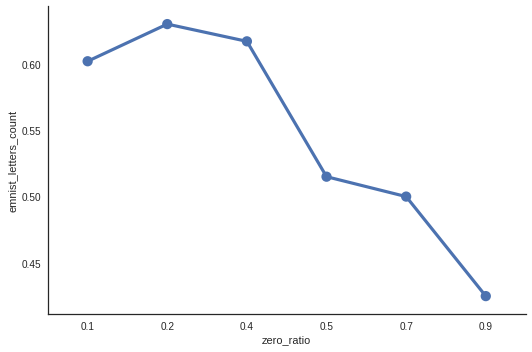

In [21]:
df = df_full
df = df[df['sampler'] == 'mnist_deep_kchannel']
df = df[df['nb_layers']==3]
#df = df[df['stride'] == 1]
#df = df[df['zero_ratio']<=0.6]
df = df.sort_values(by='zero_ratio')
sns.factorplot(x='zero_ratio', y='emnist_letters_count', data=df, size=5, aspect=1.5)

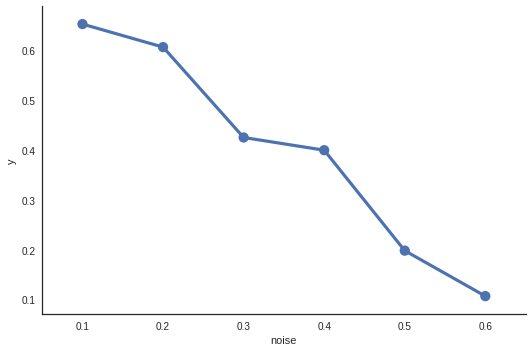

In [24]:
df = df_full
df = df[df['sampler'] == 'mnist_noise']
df = df[df['nb_layers']==3]
df = df[df['noise']<=0.6]
df = df.sort_values(by='noise')
sns.factorplot(x='noise', y='emnist_letters_count', data=df, size=5, aspect=1.5)
#show_several(df)

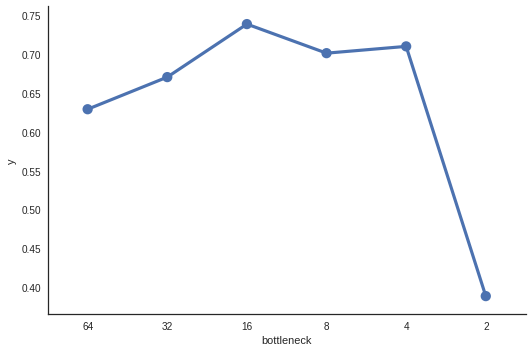

In [29]:
df = df_full
df = df[df['sampler'] == 'mnist_capacity']
#df.loc[:, 'bottleneck'] = df['bottleneck'].astype(int)
df  = df[df['nb_layers']==3]
df = df.sort_values(by='bottleneck', ascending=False)
sns.factorplot(x='bottleneck', y='y', data=df, order=[64, 32, 16, 8, 4, 2], size=5, aspect=1.5)
#show_several(df)

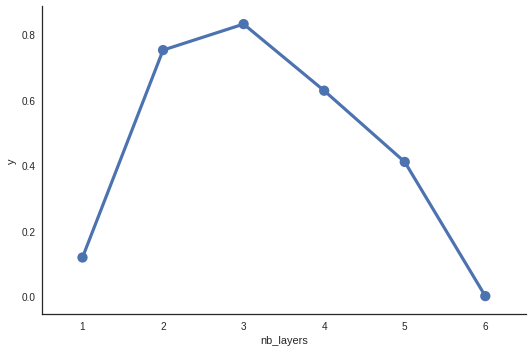

In [27]:
df = df_full
df = df[df['sampler'] == 'mnist_deep']
df = df[df['stride']==1]
sns.factorplot(x='nb_layers', y='y', data=df, size=5, aspect=1.5)

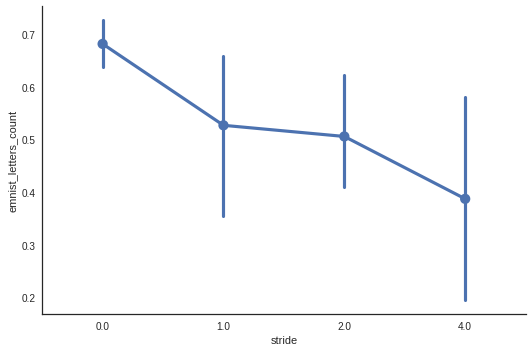

In [28]:
df = df_full
df = df[df['sampler'] == 'mnist_deep']
#df = df[df['nb_layers']==6]
sns.factorplot(x='stride', y='emnist_letters_count', data=df, size=5, aspect=1.5)